In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


In [34]:
black_img = np.zeros([20,20,1])


Text(0, 0.5, 'Number of Pixels')

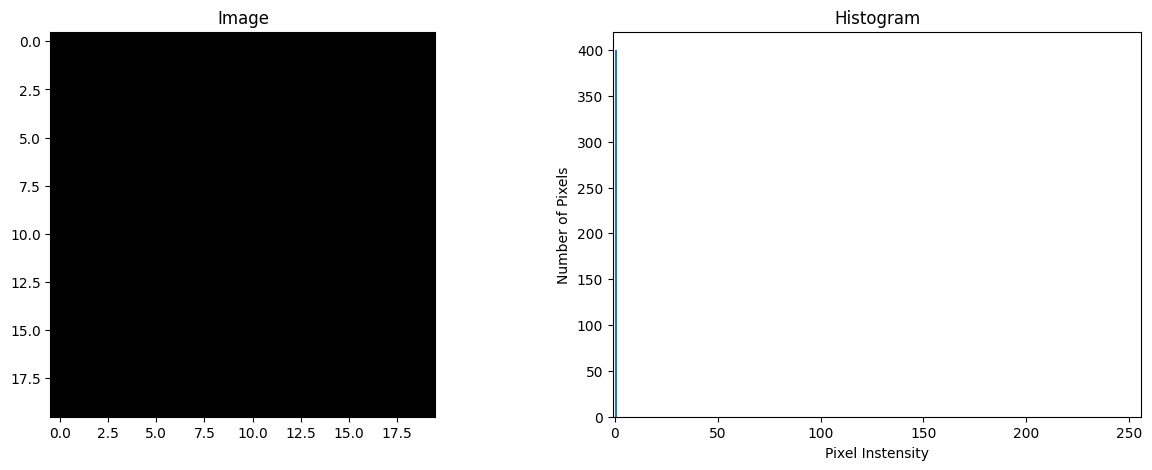

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(black_img, cmap='gray'); ax[0].set_title("Image")

ax[1].hist(black_img.flatten(), bins=256, range=(0,255)); ax[1].set_xlim([-1,256]); 
ax[1].set_title("Histogram"); ax[1].set_xlabel("Pixel Instensity"); ax[1].set_ylabel("Number of Pixels")


In [36]:
img =  cv2.imread("../data/checkerboard_18x18.png",0) # 0 = cv2.IMREAD_GRAYSCALE

print(f"shape:{img.shape}, Unique:{np.unique(img)}")


shape:(18, 18), Unique:[  0 255]


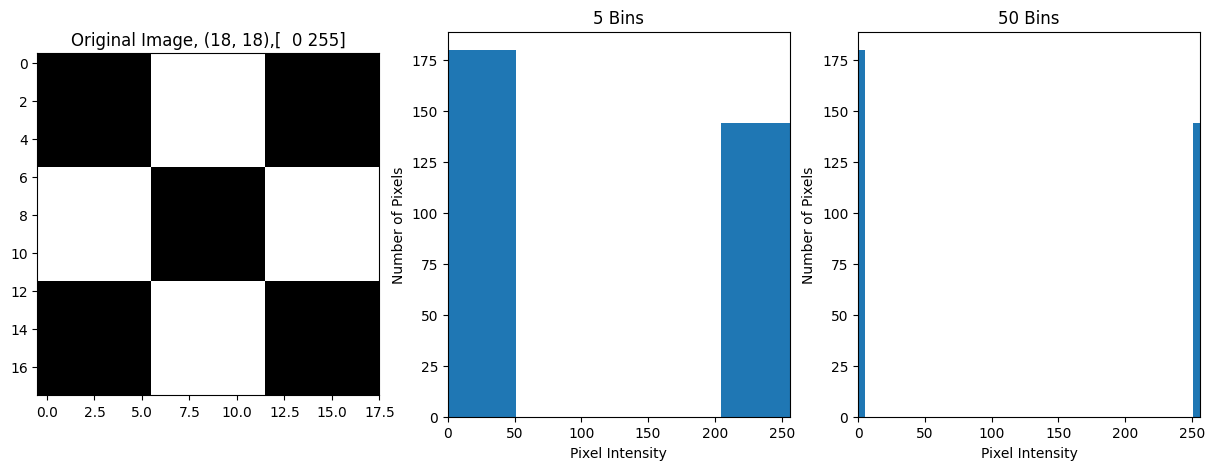

In [37]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(img,cmap='gray'); ax[0].set_title(f"Original Image, {img.shape},{np.unique(img)}")

bins=5
ax[1].hist(img.flatten(), bins, [0,256]);ax[1].set_title(f"{bins} Bins")

bins=50
ax[2].hist(img.flatten(), bins, [0,256]);ax[2].set_title(f"{bins} Bins")

for axis in ax[1:]:
    axis.set_ylabel("Number of Pixels")
    axis.set_xlabel("Pixel Intensity")
    axis.set_xlim([0,256])

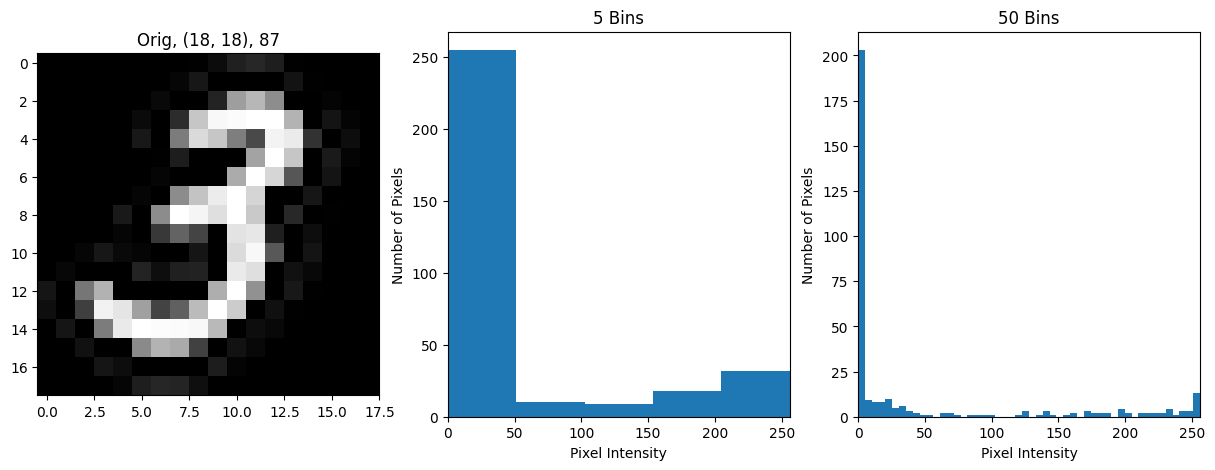

In [38]:
img = cv2.imread("../data/MNIST_3_18x18.png",0)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(img, cmap="gray"); ax[0].set_title(f"Orig, {img.shape}, {len(np.unique(img))}")

bins = 5
ax[1].hist(img.flatten(), bins, [0,256]); ax[1].set_title(f"{bins} Bins")

bins = 50
ax[2].hist(img.flatten(), bins, [0,256]); ax[2].set_title(f"{bins} Bins")

for axis in ax[1:]:
    axis.set_xlabel("Pixel Intensity")
    axis.set_ylabel("Number of Pixels")
    axis.set_xlim([0,256])

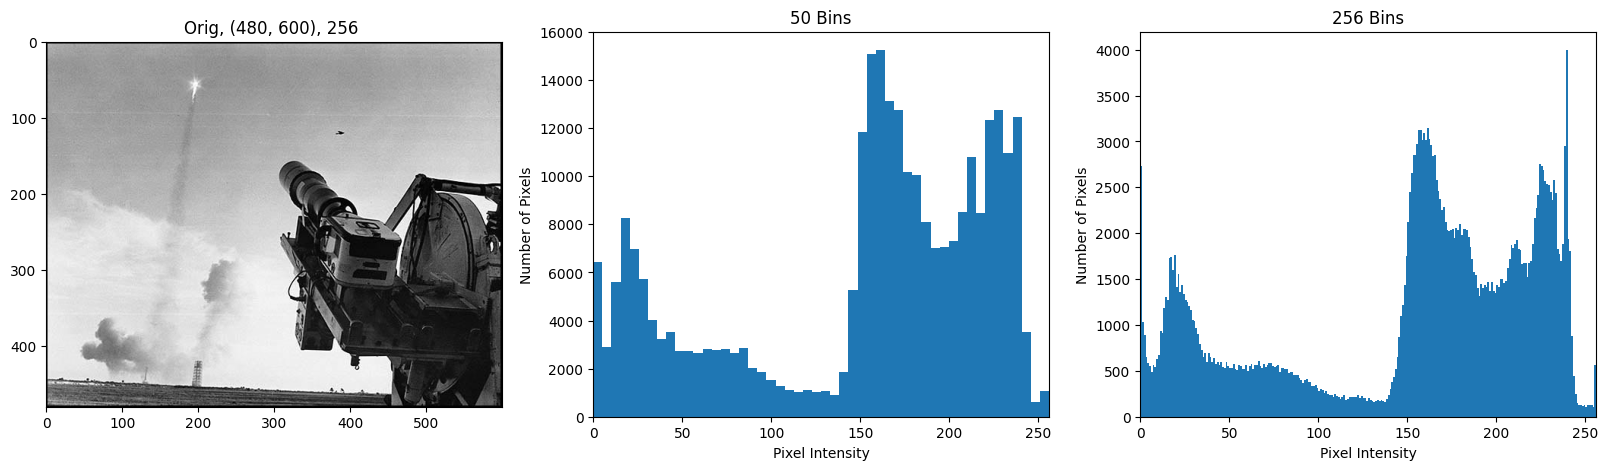

In [39]:
img = cv2.imread("../data/Apollo-8-Launch.jpg",0)

fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].imshow(img, cmap="gray"); ax[0].set_title(f"Orig, {img.shape}, {len(np.unique(img))} ")

bins = 50
ax[1].hist(img.flatten(), bins, [0,256]); ax[1].set_title(f"{bins} Bins")

bins = 256
ax[2].hist(img.flatten(), bins, [0,256]); ax[2].set_title(f"{bins} Bins")

for axe in ax[1:]:
    axe.set_xlabel("Pixel Intensity")
    axe.set_ylabel("Number of Pixels")
    axe.set_xlim([0,256])

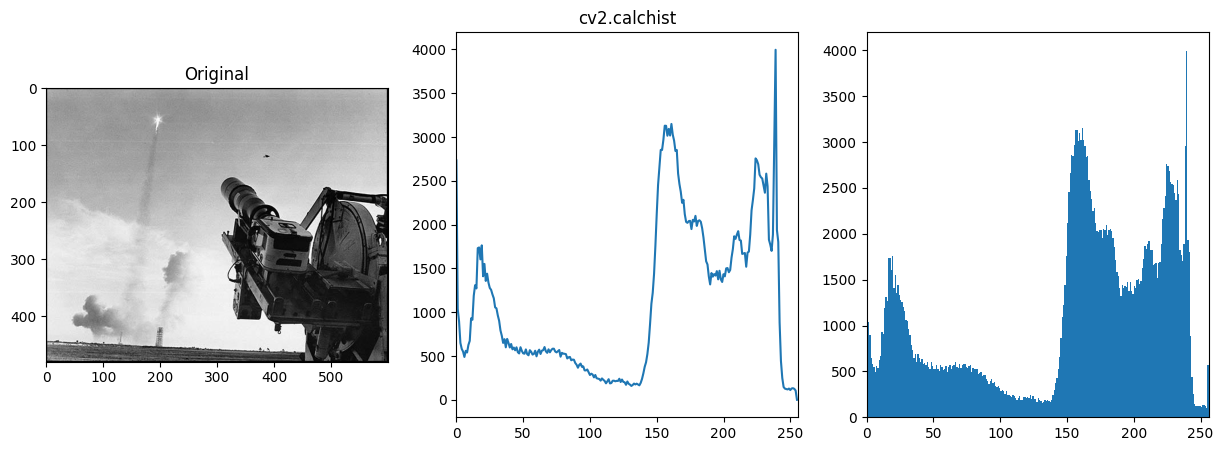

In [40]:
# Calculate the histograms
hist = cv2.calcHist(images = [img], channels = [0], mask = None, histSize = [256], ranges = [0,255])

# Flatten 
img_flatten = img.flatten()

# Plot
fig, ax = plt.subplots(1,3, figsize=(15,5))


ax[0].imshow(img, cmap='gray'); ax[0].set_title("Original")
ax[1].plot(hist); ax[1].set_title("cv2.calchist")
ax[2].hist(img_flatten, bins=256, range=[0,256])

for axis in ax[1:]:
    axis.set_xlim([0,256])



### Different images can have identical histograms

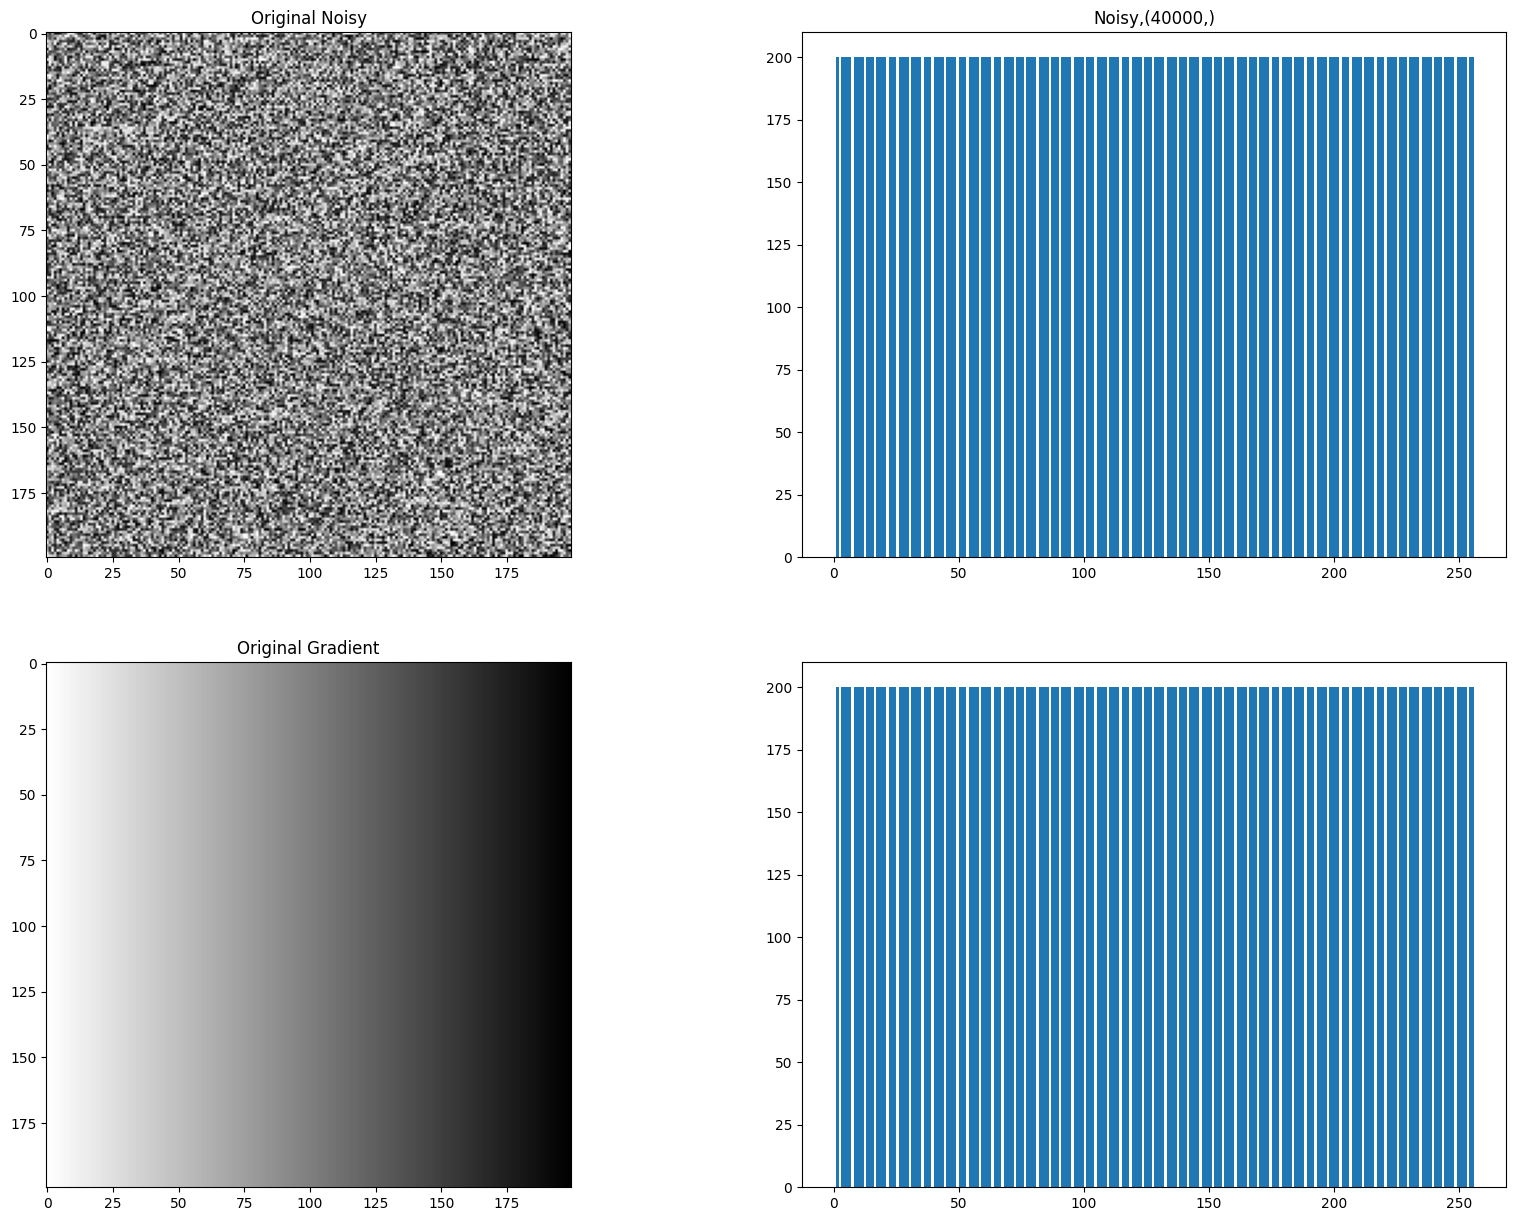

In [41]:
img_gradient = cv2.imread("../data/linear_graident.png",cv2.IMREAD_GRAYSCALE)
img_noisy = cv2.imread("../data/noisy.png",cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2,2, figsize=(20,15))
ax[0,0].imshow(img_noisy, cmap="gray");     ax[0,0].set_title("Original Noisy");
ax[0,1].hist(img_noisy.flatten(), bins=256, range=[0,256]); ax[0,1].set_title(f"Noisy,{img_noisy.flatten().shape}");

ax[1,0].imshow(img_gradient, cmap="gray");  ax[1,0].set_title("Original Gradient") ;
ax[1,1].hist(img_gradient.flatten(), bins=256, range=[0,256]);



## Color Histograms

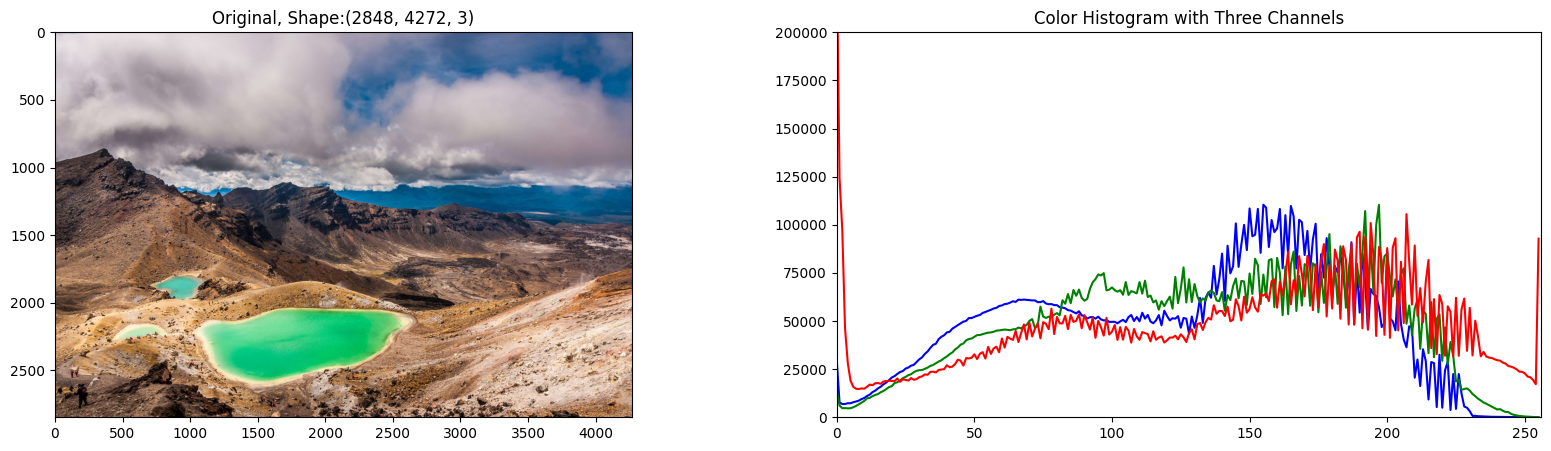

In [42]:
img = cv2.imread("../data/Emerald_Lakes_New_Zealand.jpg")

# compute histograms for each color channel
blue = cv2.calcHist([img], [0], None, [256], [0,255])
green = cv2.calcHist([img], [1], None, [256], [0,255] )
red = cv2.calcHist([img], [2], None, [256], [0,256])

# Display
fig, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].imshow(img[:,:,::-1]); ax[0].set_title(f"Original, Shape:{img.shape}")

ax[1].set_title(f"Color Histogram with Three Channels")
ax[1].set_xlim([0,256]); ax[1].set_ylim([0,200000])
ax[1].plot(blue, 'b')
ax[1].plot(green, 'g')
ax[1].plot(red, 'r')


(0.0, 200000.0)

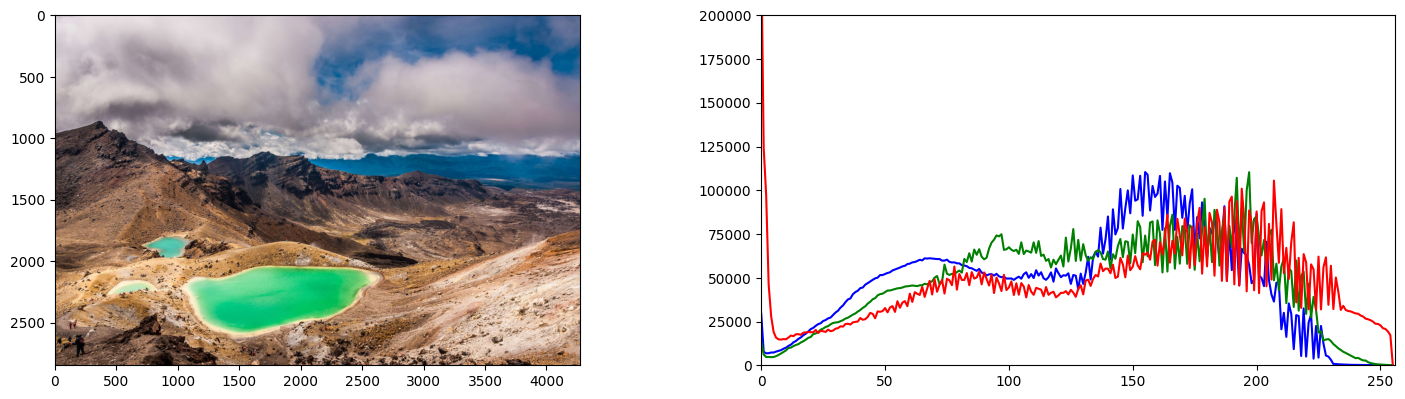

In [43]:
# Read the color images.
img = cv2.imread('../data/Emerald_Lakes_New_Zealand.jpg')

# Compute histograms for each color channel for both images.
hist1 = cv2.calcHist([img], [0], None, [256], [0, 255])
hist2 = cv2.calcHist([img], [1], None, [256], [0, 255])
hist3 = cv2.calcHist([img], [2], None, [256], [0, 255])

# Display the images and histogram plots.
plt.figure(figsize = [18, 10])
plt.subplot(221); plt.imshow(img[:, :, ::-1])

plt.subplot(222) 
plt.plot(hist1, 'b'); plt.plot(hist2, 'g'); plt.plot(hist3, 'r') 
plt.xlim([0, 256])
plt.ylim([0, 200000])

In [44]:
# Use the mask option in cv2.calcHist

img = cv2.imread("../data/Emerald_Lakes_New_Zealand.jpg")

# Create mask, size of the image
mask = np.zeros( (img.shape[0], img.shape[1]), dtype="uint8")

# Select lake in picture via sliciing
mask[2100:2400, 1500:2200] = 255



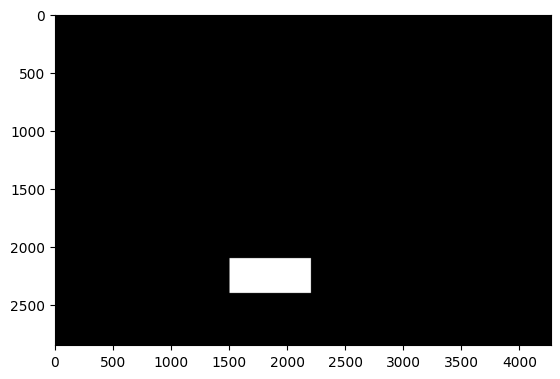

In [45]:
plt.imshow(mask, cmap="gray")

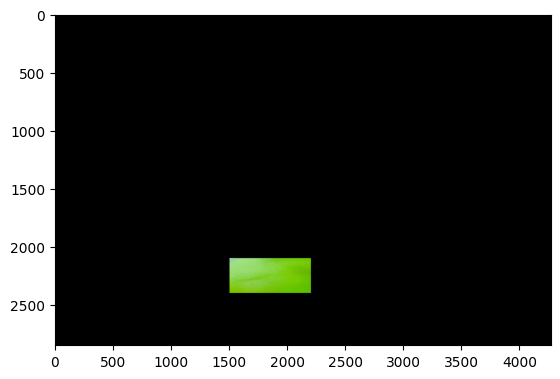

In [46]:
# Create a similar mask to show the selected region in the image (for display purposes only).
# The mask must have the same number of color channels as the image, but each color channel will
# contain the same information.
mat = [mask, mask, mask]
mask_3ch = cv2.merge(mat, 3)

# Create an iamge that only shows the selected region of interest
img_roi = cv2.bitwise_and(img, mask_3ch)

plt.imshow(img_roi)

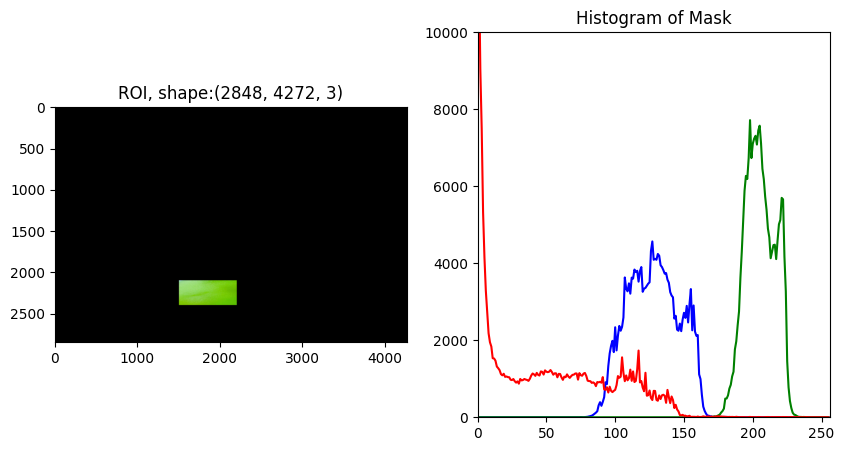

In [50]:
# Compute the histograms for each channel
blue = cv2.calcHist([img], [0], mask, [256], [0,255])
green = cv2.calcHist([img], [1], mask, [256], [0,255])
red = cv2.calcHist([img], [2], mask, [256], [0,255])

# Plot
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(img_roi, cmap="gray"); ax[0].set_title(f"ROI, shape:{img_roi.shape}")

ax[1].set_title("Histogram of Mask")
ax[1].set_xlim([0,256]); ax[1].set_ylim([0,10000])
ax[1].plot(blue,'b')
ax[1].plot(green,'g')
ax[1].plot(red,'r')

## Histogram Equalization

A non-linear method for enhancing contrast in an image

Text(0.5, 1.0, 'Equalized')

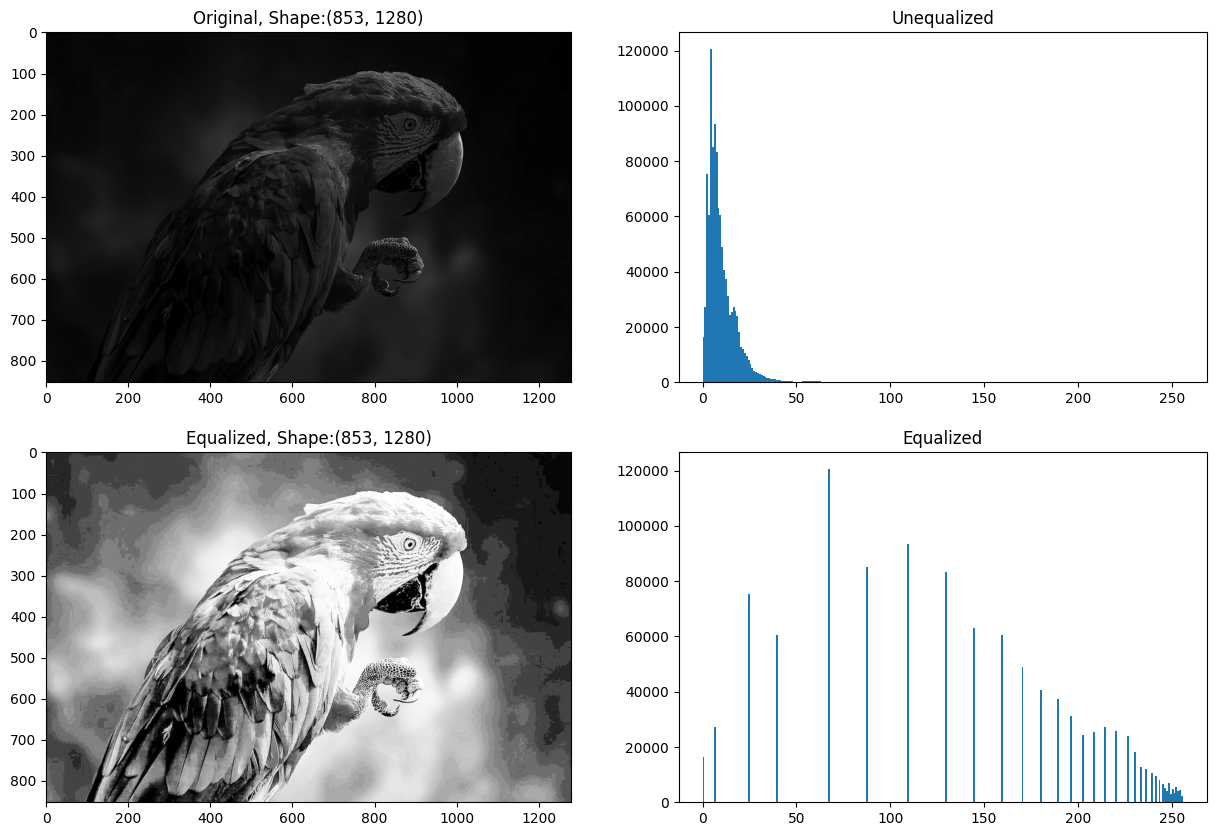

In [55]:
# Read image into Grayscale
img = cv2.imread("../data/parrot.jpg", 0)

# Equalize histogram
img_eq = cv2.equalizeHist(img)

fig, ax = plt.subplots(2,2, figsize=(15,10))

ax[0,0].imshow(img, cmap="gray"); ax[0,0].set_title(f"Original, Shape:{img.shape}")
ax[0,1].hist(img.flatten(), 256, [0,256]);ax[0,1].set_title("Unequalized")
ax[1,0].imshow(img_eq, cmap="gray"); ax[1,0].set_title(f"Equalized, Shape:{img.shape}")
ax[1,1].hist(img_eq.flatten(), 256, [0,256]); ax[1,1].set_title("Equalized")

## Incorrect Histogram Equalization

Peforming equalization on each channel is not correct (unless you're looking from an artistic view)

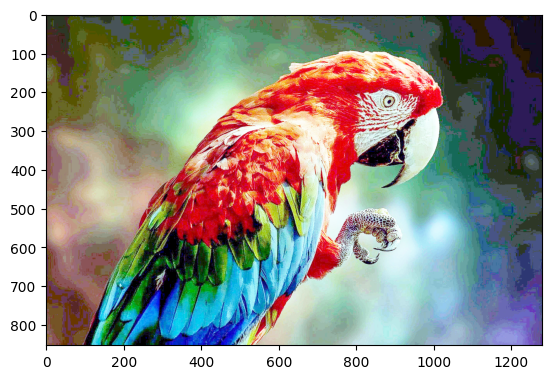

In [57]:
img = cv2.imread("../data/parrot.jpg")

b,g,r = cv2.split(img)

b = cv2.equalizeHist(b)
g = cv2.equalizeHist(g)
r = cv2.equalizeHist(r)

img_eq = cv2.merge([b,g,r])

plt.imshow(img_eq[:,:,::-1])

## Correct way: Convert to HSV, perform the equalizatoin on the V channel and coverent back

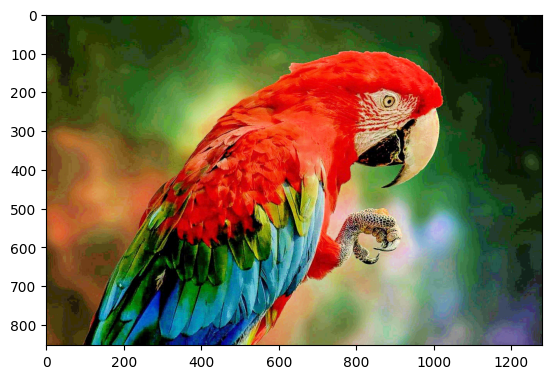

In [60]:
img = cv2.imread("../data/parrot.jpg")

# Convert to HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Perform equalization on V channel only (v=intensity)
img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:,:,2])

# Convert back
img_eq = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

plt.imshow(img_eq[:,:,::-1])